In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("subratasarkar32/low-light-animals")

print("Path to dataset files:", path)


100%|██████████| 1.79G/1.79G [00:25<00:00, 76.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/subratasarkar32/low-light-animals/versions/2


In [3]:
import os

for dirpath, dirnames, filenames in os.walk(path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images, in {dirpath}")

There are 1 directories and 1 images, in /root/.cache/kagglehub/datasets/subratasarkar32/low-light-animals/versions/2
There are 1 directories and 0 images, in /root/.cache/kagglehub/datasets/subratasarkar32/low-light-animals/versions/2/animals_low_light
There are 90 directories and 0 images, in /root/.cache/kagglehub/datasets/subratasarkar32/low-light-animals/versions/2/animals_low_light/animals_low_light
There are 0 directories and 60 images, in /root/.cache/kagglehub/datasets/subratasarkar32/low-light-animals/versions/2/animals_low_light/animals_low_light/hornbill
There are 0 directories and 60 images, in /root/.cache/kagglehub/datasets/subratasarkar32/low-light-animals/versions/2/animals_low_light/animals_low_light/starfish
There are 0 directories and 60 images, in /root/.cache/kagglehub/datasets/subratasarkar32/low-light-animals/versions/2/animals_low_light/animals_low_light/orangutan
There are 0 directories and 60 images, in /root/.cache/kagglehub/datasets/subratasarkar32/low-ligh

In [4]:
#so from here we can see there is no train test split applied to the data as is

#this package allows splitting directories into training and test sets
!pip install split-folders

In [5]:
#define the folder where all of the data is stored
input_folder = '/root/.cache/kagglehub/datasets/subratasarkar32/low-light-animals/versions/2/animals_low_light/animals_low_light'

#create the folder where the training and test sets will be stored
output = "content/train_test_split"

#create the split folder
import splitfolders
splitfolders.ratio(input_folder, output = output, seed = 42, ratio= (0.8, .2))

Copying files: 5400 files [00:07, 709.15 files/s]


In [6]:
#now the data is split into training and test sets.
for dirpath, dirnames, filenames in os.walk("content"):
  print(f"There are {len(dirnames)} directories, and {len(filenames)} images in {dirpath}")

There are 1 directories, and 0 images in content
There are 2 directories, and 0 images in content/train_test_split
There are 90 directories, and 0 images in content/train_test_split/val
There are 0 directories, and 12 images in content/train_test_split/val/hornbill
There are 0 directories, and 12 images in content/train_test_split/val/starfish
There are 0 directories, and 12 images in content/train_test_split/val/orangutan
There are 0 directories, and 12 images in content/train_test_split/val/parrot
There are 0 directories, and 12 images in content/train_test_split/val/rat
There are 0 directories, and 12 images in content/train_test_split/val/turkey
There are 0 directories, and 12 images in content/train_test_split/val/bat
There are 0 directories, and 12 images in content/train_test_split/val/caterpillar
There are 0 directories, and 12 images in content/train_test_split/val/duck
There are 0 directories, and 12 images in content/train_test_split/val/reindeer
There are 0 directories, and

In [7]:
#lets set up training and test directories
train_dir = "content/train_test_split/train"
test_dir = "content/train_test_split/val"

In [8]:
#get the image classes
"""
lets set up our data to increase functionality and retrive class names
"""
import tensorflow as tf

#set up global variables
IMG_SIZE = (224, 224) #setting a global image size to be passed to future models
BATCH_SIZE = 32 #setting global batchsize for completeness even though 32 is default

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    image_size = IMG_SIZE,
    label_mode = "categorical",
    batch_size = BATCH_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size = IMG_SIZE,
    label_mode = "categorical",
    batch_size = BATCH_SIZE
)

#now the data is generated for modeling purposes

Found 4320 files belonging to 90 classes.
Found 1080 files belonging to 90 classes.


In [9]:
class_names = train_data.class_names #creating a classnames variable to visualize random images

In [10]:
#lets visualize random images from the directories
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir):

  """
  This function randomly plots 4 images from the target directory to quickly understand the images in the dataset.

  Args:
    target_dir: enter the directory which you want to view images from
  """
  #get a random class from the classes variable
  for i in range(0, 4):

    plt.subplot(2, 2, i + 1)

    random_class = random.choice(class_names)

    #use that random class to naviage to the folder of the random class
    target_folder = target_dir+"/"+random_class

    #get a random image from the target folder
    random_image = random.sample(os.listdir(target_folder), 1)

    #read that image in by indexing deeper into the folder to the specifc image inside that folder
    img = mpimg.imread(target_folder +"/" +random_image[0])

    plt.imshow(img)
    plt.axis("off")
    plt.title(random_class)


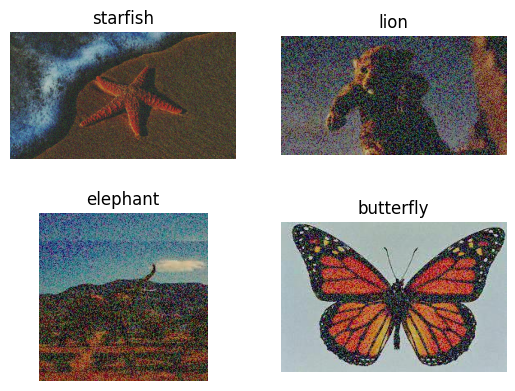

In [11]:
view_random_image(train_dir)

In [12]:
for images, labels in train_data.take(1):
  print(images, labels)

"""
here we can see that the image data is not normalized, which is fine for efficient net models but might need to be adjusted later,

the training labels are onehot encoded on 90 classes.
"""

tf.Tensor(
[[[[154.52344   173.52344   187.52344  ]
   [156.90625   175.90625   189.90625  ]
   [154.74219   173.74219   187.74219  ]
   ...
   [ 33.734375   27.90625    80.85156  ]
   [ 87.11719    97.75781   113.25781  ]
   [ 62.265625   49.21875    56.109375 ]]

  [[153.60938   172.60938   186.60938  ]
   [156.20312   175.20312   189.20312  ]
   [159.78906   178.78906   192.78906  ]
   ...
   [ 74.765625   72.28906    88.546875 ]
   [ 72.72656    68.734375   88.47656  ]
   [ 57.1875     39.257812   37.492188 ]]

  [[156.11719   175.11719   189.11719  ]
   [158.29688   177.29688   191.29688  ]
   [153.49219   172.49219   186.49219  ]
   ...
   [ 13.234375   14.78125    39.59375  ]
   [ 30.007812    8.9765625  48.835938 ]
   [ 40.617188   35.859375   46.867188 ]]

  ...

  [[111.859375   86.9375     53.1875   ]
   [142.41406   134.45312   103.49219  ]
   [153.40625   135.85156   102.67969  ]
   ...
   [159.94531   146.57031   111.5      ]
   [160.25      146.47656   115.71875  ]
   [1

'\nhere we can see that the image data is not normalized, which is fine for efficient net models but might need to be adjusted later,\n\nthe training labels are onehot encoded on 90 classes.\n'

In [13]:
images.shape, labels.shape #32 represents the batch size in the shapes

(TensorShape([32, 224, 224, 3]), TensorShape([32, 90]))

In [14]:
def create_tensorboard_callback(dir_name, experiment_name):
  """
  saves tensorboard visualizations to log directory: dirname/experimentname/current_datetime/

  Args:
    dirname: name of directory to store tensorboard log files
    experiment_name : name of directory
  """


  import datetime
  log_dir = dir_name+"/"+experiment_name+"/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir = log_dir
  )

  print(f"saving tensorboard log files to {log_dir}")

  return tensorboard_callback

In [15]:
#creating basic cnn explainer website model to classify animal classes:

inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = "input_layer")

#create two conv2d layers
x = tf.keras.layers.Conv2D(10, 3, activation = "relu")(inputs)
x = tf.keras.layers.Conv2D(10, 3, activation = "relu")(x)

#pass the results of the convolutional layers into a maxpooling layer
x = tf.keras.layers.MaxPool2D(name = "pooling_layer_1")(x)

#create another two conv2D layers
x = tf.keras.layers.Conv2D(10, 3, activation = "relu")(x)
x = tf.keras.layers.Conv2D(10, 3, activation = "relu")(x)

#create another maxpooling layer
x = tf.keras.layers.MaxPool2D(name = "pooling_layer_2")(x)

#create final conv2D layers
x = tf.keras.layers.Conv2D(10, 3, activation = "relu")(x)
x = tf.keras.layers.Conv2D(10, 3, activation = "relu")(x)

#create final maxpooling layer
x = tf.keras.layers.MaxPool2D(name = "pooling_layer_3")(x)

#critcal layer for the model to run the outputs must be vectorized
x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(90, activation = "softmax", name = "output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

In [16]:
model_1.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = int(0.25 * len(test_data)), callbacks = create_tensorboard_callback("animals_models", "simple_model"))

saving tensorboard log files to animals_models/simple_model/20250322-124553
Epoch 1/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 36s 207ms/step - accuracy: 0.0156 - loss: 5.0361 - val_accuracy: 0.0312 - val_loss: 4.4212
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 34s 198ms/step - accuracy: 0.0989 - loss: 4.0306 - val_accuracy: 0.1250 - val_loss: 4.6515
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 82s 505ms/step - accuracy: 0.5236 - loss: 2.0263 - val_accuracy: 0.1055 - val_loss: 6.7508
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - accuracy: 0.8219 - loss: 0.7344 - val_accuracy: 0.1289 - val_loss: 10.5257
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 303ms/step - accuracy: 0.9470 - loss: 0.2218 - val_accuracy: 0.1289 - val_loss: 17.5355


In [17]:
#heres how the model perfoms on the full testing data, roughly 18% is really good when working with 90 classes!
model_1_results = model_1.evaluate(test_data)

34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.1089 - loss: 17.2290


In [18]:
#lets see how the model was doing in terms of over or underfitting by plotting its history

def plot_loss_curves(history):

  import matplotlib.pyplot as plt

  #get the training and validation accuracies
  accuracy = history.history["accuracy"]
  loss = history.history["loss"]

  #getting the validation accuracy and loss
  val_accuracy = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]

  #plotting curves
  plt.figure()
  plt.plot(accuracy, label = "training accuracy")
  plt.plot(val_accuracy, label = "validation_accuracy")
  plt.title("training accuracy vs. validation accuracy")
  plt.legend(loc = "upper left")

  plt.figure()
  plt.plot(loss, label = "training_loss")
  plt.plot(val_loss, label = "validation_loss")
  plt.title("training loss vs. validation loss")
  plt.legend(loc = "lower left");




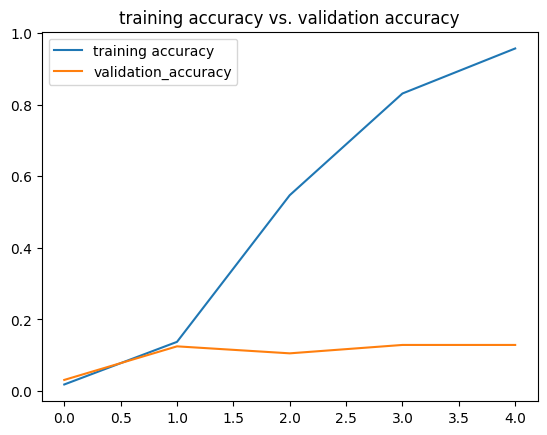

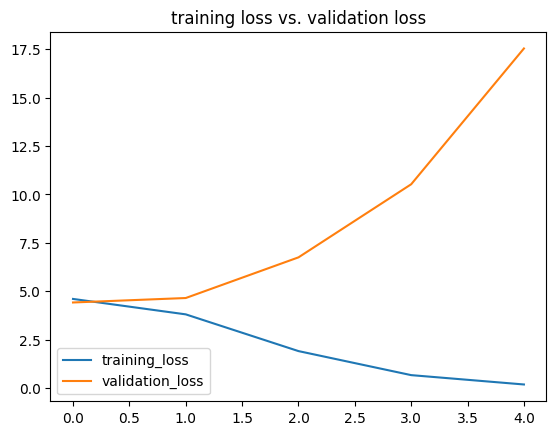

In [19]:
plot_loss_curves(history_1) #at two epochs it started overfitting to the training data. possibly because there was not enough testing data

In [20]:
int(len(test_data)*.25) #only testing on 8 images per class? im not sure if this was the issue but i might be

8

In [21]:
#trying efficientnetb4 to try to imporove results with a stronger base_model

from tensorflow import keras

base_model = keras.applications.EfficientNetB4(include_top = False)

base_model.trainable = False

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

  #here we can see all of the layers in the base_model are frozen and that rescaling exists already at layer [1]

0 input_layer False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block2a_expand_conv False
31 block2a_expand_bn False
32 block2a_expand_activation False
33 block2a_dwconv_pad False
34 block2a_dwconv False
35 block2a_bn False
36 block2a_activation False
37 block2a_se_squeeze False
38 block2a_se_reshape False
39 block2a_se_redu

In [23]:
#not going to use any data augmentation yet

#global input size
input_size = (224, 224, 3)

#creating a model with the functional api
inputs = tf.keras.layers.Input(shape = input_size, name = "input_layer")

#passing the inputs to the base_model
x = base_model(inputs, training = False)

#passing the base model results to the next layer
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling")(x)

#passing the results from the pooling layer to the output layer
outputs = tf.keras.layers.Dense(90, activation = "softmax", name = "output_layer")(x)

#making the model
model_2 = tf.keras.Model(inputs, outputs)



In [24]:
#creating a model checkpoint for fine tuning later
checkpoint_path = "animal_data_checkpoints_weights/checkpoint.ckpt.weights.h5"

#creating the checkpoint
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         monitor = "val_loss",
                                                         verbose = 1,
                                                         save_best_only = True)

In [25]:
#now we need to compile the model
model_2.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_2 = model_2.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = int(0.25 * len(test_data)),
            callbacks = [create_tensorboard_callback("animals_models", "efficientnetb4_no_finetuning"), checkpoint_callback])

saving tensorboard log files to animals_models/efficientnetb4_no_finetuning/20250322-124959
Epoch 1/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.2447 - loss: 3.7503
Epoch 1: val_loss improved from inf to 1.94770, saving model to animal_data_checkpoints_weights/checkpoint.ckpt.weights.h5


135/135 ━━━━━━━━━━━━━━━━━━━━ 82s 290ms/step - accuracy: 0.2458 - loss: 3.7452 - val_accuracy: 0.5898 - val_loss: 1.9477
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.6574 - loss: 1.6592
Epoch 2: val_loss improved from 1.94770 to 1.52592, saving model to animal_data_checkpoints_weights/checkpoint.ckpt.weights.h5


135/135 ━━━━━━━━━━━━━━━━━━━━ 49s 215ms/step - accuracy: 0.6575 - loss: 1.6584 - val_accuracy: 0.6602 - val_loss: 1.5259
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.7392 - loss: 1.2052
Epoch 3: val_loss improved from 1.52592 to 1.43912, saving model to animal_data_checkpoints_weights/checkpoint.ckpt.weights.h5


135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 304ms/step - accuracy: 0.7392 - loss: 1.2050 - val_accuracy: 0.6641 - val_loss: 1.4391
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.7835 - loss: 0.9709
Epoch 4: val_loss improved from 1.43912 to 1.31083, saving model to animal_data_checkpoints_weights/checkpoint.ckpt.weights.h5


135/135 ━━━━━━━━━━━━━━━━━━━━ 30s 223ms/step - accuracy: 0.7836 - loss: 0.9708 - val_accuracy: 0.6719 - val_loss: 1.3108
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.8253 - loss: 0.8121
Epoch 5: val_loss did not improve from 1.31083
135/135 ━━━━━━━━━━━━━━━━━━━━ 38s 205ms/step - accuracy: 0.8254 - loss: 0.8119 - val_accuracy: 0.6445 - val_loss: 1.4521


In [26]:
model_2_results = model_2.evaluate(test_data) #accuracy increased by almost over 40%! with out fine tuning or data augmentation

34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 422ms/step - accuracy: 0.6471 - loss: 1.3887


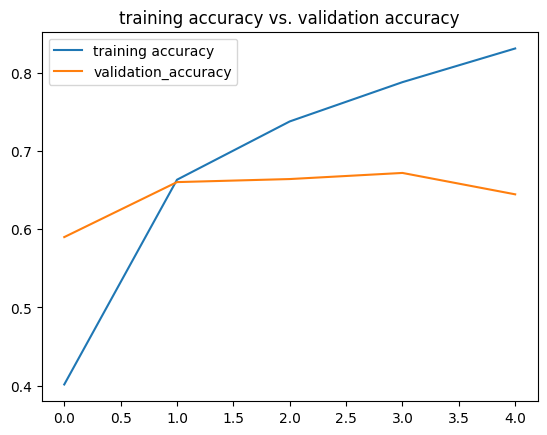

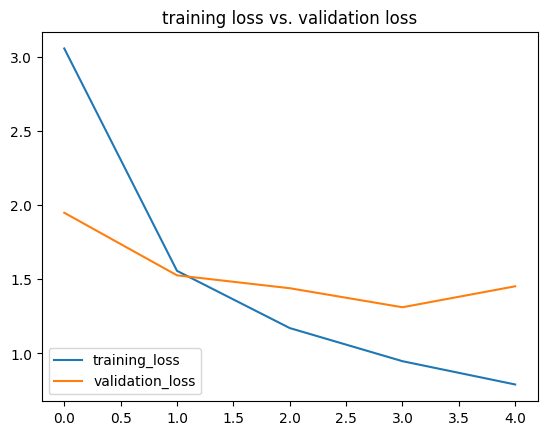

In [27]:
plot_loss_curves(history_2) #the model is doing well but there are issues with the training and loss curves generalization

In [37]:
"""
lets take model 2 results and imporove them by unfreezing the final 10 layers and using model checkpoint to continue training for another 5 epochs

first we can build another replicate of model 2 with data augmentation and call it model 3

model 2s loss curves look a lot better than model 1, however the model is still overfitting to the training data and losing ability to generalize its patterns to the test data,

to solve the overfitting of the model we can try data augmentation, adding more data, reducing model complexity, or early stopping rounds
"""

#creating an augmentation layer for the data
from keras import layers, Sequential

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomShear(0.2),
    tf.keras.layers.Resizing(224, 224)
])


In [38]:
#visualize augmented image vs the original image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def compare_images(target_dir):

  #getting a random class
  random_class = random.choice(class_names)

  #creating the target folder
  target_folder = target_dir+"/"+random_class

  #getting the image file
  random_image = random.sample(os.listdir(target_folder), 1)

  #reading in the image
  img = mpimg.imread(target_folder+"/"+random_image[0])

  #plotting original images
  plt.figure()
  plt.imshow(img)
  plt.title(f"original {random_class}")
  plt.axis("off")

  #plotting augmented images
  plt.figure()
  augmented_image = data_augmentation(img/255.)
  plt.imshow(augmented_image)
  plt.title("augmented_image")
  plt.axis("off")

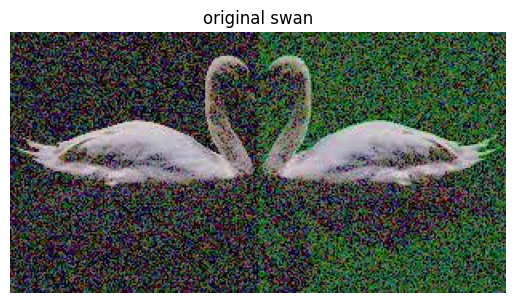

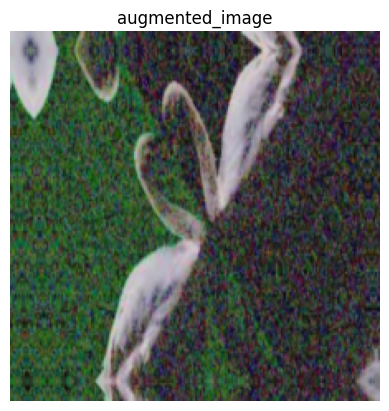

In [39]:
compare_images(train_dir)

In [41]:

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomShear(0.2),
    tf.keras.layers.Resizing(224, 224)
])


base_model_3 = keras.applications.EfficientNetB4(include_top=False)
base_model_3.trainable = False

#creating the inputs
inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = "input_layer")

#augmenting the inputs
x = data_augmentation(inputs)

#passing the inputs to the base_model (same base model as model_2)
x = base_model_3(x, training = False)

#passing the results to global_average_pooling_layer
x = layers.GlobalAveragePooling2D(name = "pooling_layer")(x)

#passing the results to a custom output layer to match animal data
outputs = layers.Dense(90, activation="softmax", name = "output_layer")(x)

model_3 = tf.keras.Model(inputs, outputs)



In [42]:
#creating a model checkpoint for fine tuning later
checkpoint_path_2  = "animal_data_checkpoints_weights/augmented_checkpoint.ckpt.weights.keras"

#creating the checkpoint
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path_2,
                                                         monitor = "val_loss",
                                                         verbose = 1,
                                                         save_best_only = True)

In [43]:
model_3.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_3 = model_3.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data= test_data, validation_steps = len(test_data),
                        callbacks = [create_tensorboard_callback("animals_models", "augmented_model"), checkpoint_callback])

saving tensorboard log files to animals_models/augmented_model/20250322-130428
Epoch 1/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.1362 - loss: 4.0820
Epoch 1: val_loss improved from inf to 2.51275, saving model to animal_data_checkpoints_weights/augmented_checkpoint.ckpt.weights.keras
135/135 ━━━━━━━━━━━━━━━━━━━━ 67s 326ms/step - accuracy: 0.1369 - loss: 4.0788 - val_accuracy: 0.5028 - val_loss: 2.5127
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.4334 - loss: 2.6607
Epoch 2: val_loss improved from 2.51275 to 1.97337, saving model to animal_data_checkpoints_weights/augmented_checkpoint.ckpt.weights.keras
135/135 ━━━━━━━━━━━━━━━━━━━━ 73s 273ms/step - accuracy: 0.4334 - loss: 2.6601 - val_accuracy: 0.5685 - val_loss: 1.9734
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.4891 - loss: 2.2298
Epoch 3: val_loss improved from 1.97337 to 1.78349, saving model to animal_data_checkpoints_weights/augmented_checkpoint.ckpt.weights.keras
135/

In [44]:
model_3_results = model_3.evaluate(test_data)

34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - accuracy: 0.6052 - loss: 1.5962


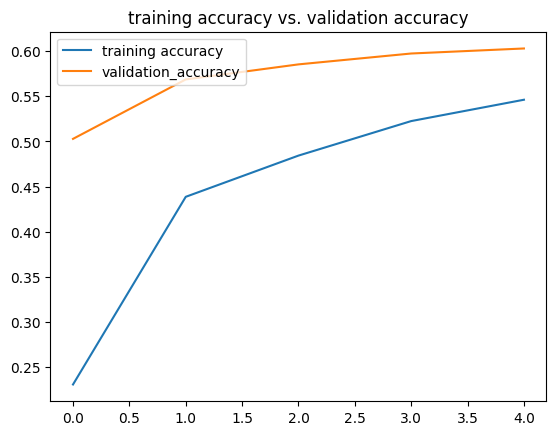

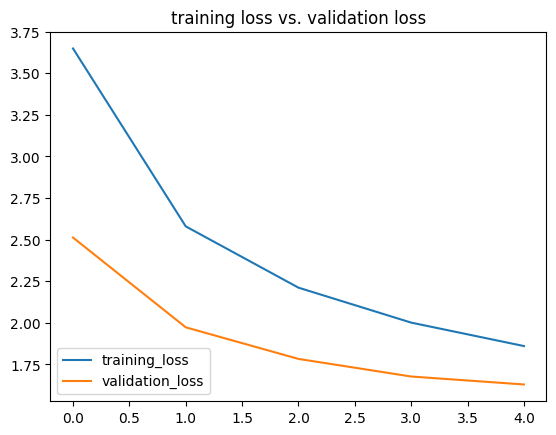

In [45]:
plot_loss_curves(history_3) #the model curves are alot nicer even though the accuracy is lower, this model has room to be scaled and as a more trustable solution to generalize on the test data and not just make blind assumptions based off training pattens

In [46]:
#this model can benefit from another 5 layers of fine tuning

for layer in base_model_3.layers[-10:]:
  layer.trainable = True


In [47]:
for layer_number, layer in enumerate(base_model_3.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_8 False
1 rescaling_10 False
2 normalization_5 False
3 rescaling_11 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block2a_expand_conv False
31 block2a_expand_bn False
32 block2a_expand_activation False
33 block2a_dwconv_pad False
34 block2a_dwconv False
35 block2a_bn False
36 block2a_activation False
37 block2a_se_squeeze False
38 block2a_se_reshape False
39 block2a

In [48]:
#now the last 10 layers are trainable inside model 3, so we just need to recompile model 3,
#use our model checkpoint to start training from previous models results

model_3.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001), #need to lower learning rate 10x for fine tuning
    metrics = ["accuracy"]
)



In [49]:
history_4 = model_3.fit(train_data, epochs = 10, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps=int(0.25 * len(test_data)),
            callbacks= [create_tensorboard_callback("animals_models", "finetuning_model")], initial_epoch =history_3.epoch[-1])

saving tensorboard log files to animals_models/finetuning_model/20250322-130943
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 59s 264ms/step - accuracy: 0.5662 - loss: 1.7914 - val_accuracy: 0.6016 - val_loss: 1.5951
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 300ms/step - accuracy: 0.5975 - loss: 1.6249 - val_accuracy: 0.6367 - val_loss: 1.4023
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 72s 231ms/step - accuracy: 0.6105 - loss: 1.5468 - val_accuracy: 0.6289 - val_loss: 1.5429
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 290ms/step - accuracy: 0.6308 - loss: 1.5044 - val_accuracy: 0.5898 - val_loss: 1.5666
Epoch 9/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 31s 225ms/step - accuracy: 0.6456 - loss: 1.4493 - val_accuracy: 0.6484 - val_loss: 1.4310
Epoch 10/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 82s 533ms/step - accuracy: 0.6721 - loss: 1.3729 - val_accuracy: 0.6406 - val_loss: 1.3905


In [50]:
model_4_results = model_3.evaluate(test_data) #slight improvement overall need better scaling tecniques to achieve higher accuracy

34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 220ms/step - accuracy: 0.6541 - loss: 1.3875


In [51]:
#lets plot loss curves + additional traing epochs

def fine_tuning_curve(original_history, new_history):

  original_accuracy = original_history.history["accuracy"]
  original_loss = original_history.history["loss"]

  original_val_accuracy = original_history.history["val_accuracy"]
  original_val_loss = original_history.history["val_loss"]

  total_accuracy = original_accuracy + new_history.history["accuracy"]
  total_loss = original_loss + new_history.history["loss"]

  total_val_accuracy = original_val_accuracy + new_history.history["val_accuracy"]
  total_val_loss = original_val_loss + new_history.history["val_loss"]

  plt.figure()
  plt.plot(total_accuracy, label = "accuracy")
  plt.plot(total_val_accuracy, label = "val_accuracy")
  plt.plot([4, 4], plt.ylim(), label = "started_fine_tuning")
  plt.title("accuracy vs val_accuracy")
  plt.legend(loc = "lower left")

  plt.figure()
  plt.plot(total_loss, label = "loss")
  plt.plot(total_val_loss, label = "val_loss")
  plt.plot([4, 4], plt.ylim(), label = "started_fine_tuning")
  plt.title("loss vs val loss")
  plt.legend();

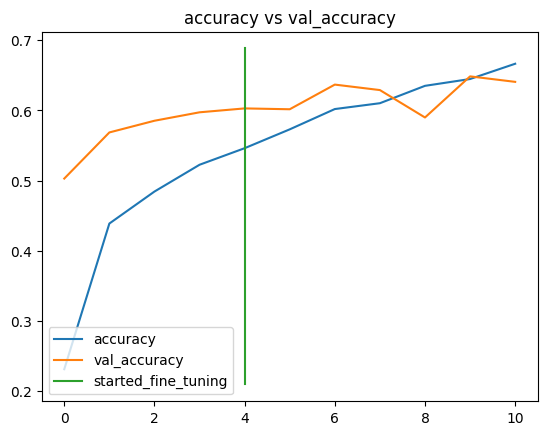

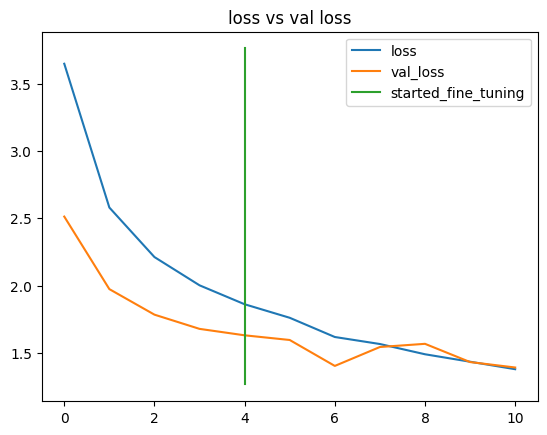

In [52]:
fine_tuning_curve(history_3, history_4)

In [53]:
#it seems like we squeezed another 3% out of the models performace but now its going to begin to overfit and the model isnt getting any better at generalizing.

In [54]:
#going to create a model to train on more epochs with more unfrozen layers

base_model_4 = keras.applications.EfficientNetB4(include_top = False)
base_model_4.trainable = False

for layer in base_model_4.layers[-30:]:
  layer.trainable = True

inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = "input_layer")

x = data_augmentation(inputs)

x = base_model_4(x, training = True)

x = tf.keras.layers.GlobalAveragePooling2D(name = "pooling_layer")(x)

outputs = tf.keras.layers.Dense(90, activation = "softmax", name = "output_layer")(x)

model_4 = tf.keras.Model(inputs, outputs)



In [55]:
model_4.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ["accuracy"]
)

history_5 = model_4.fit(train_data, epochs = 15, steps_per_epoch = len(train_data),
                        validation_data = test_data, validation_steps = int(0.25 * len(test_data)),
                        callbacks = [create_tensorboard_callback("animals_models", "more_epochs")])

saving tensorboard log files to animals_models/more_epochs/20250322-131518
Epoch 1/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 63s 281ms/step - accuracy: 0.0492 - loss: 4.4179 - val_accuracy: 0.3398 - val_loss: 3.6951
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 42s 284ms/step - accuracy: 0.3030 - loss: 3.5979 - val_accuracy: 0.4961 - val_loss: 2.6032
Epoch 3/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 33s 231ms/step - accuracy: 0.4105 - loss: 2.9017 - val_accuracy: 0.5234 - val_loss: 2.2040
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 42s 240ms/step - accuracy: 0.4695 - loss: 2.4959 - val_accuracy: 0.5938 - val_loss: 1.9321
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 296ms/step - accuracy: 0.5117 - loss: 2.2181 - val_accuracy: 0.5820 - val_loss: 1.8390
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 34s 243ms/step - accuracy: 0.5368 - loss: 2.0594 - val_accuracy: 0.6094 - val_loss: 1.6440
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 43s 260ms/step - accuracy: 0.5779 - loss: 1.8520 - val_accuracy: 0.6406 - val_loss: 1.5375
Epoch 8/

In [58]:
model_4.evaluate(test_data) #this is the strongest model yet and has the nicest loss curves..

34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.6709 - loss: 1.3133


[1.3451389074325562, 0.6722221970558167]

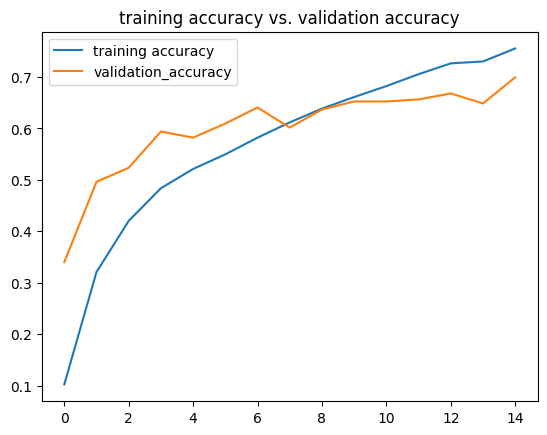

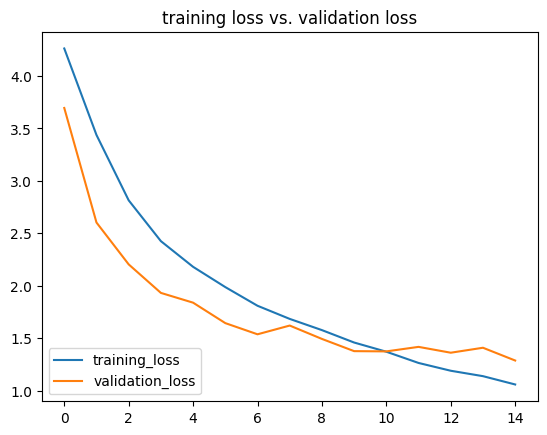

In [59]:
plot_loss_curves(history_5) #this is the best model yet, if trained any longer it will likley begin overfitting,
#after around 8 epochs where the training and val curves flip it may be a good idea to introduce a learning rate scheduler

In [ ]:
#the curves are nice but it looks like the model is reaching the boundaries of what its capable of..


In [ ]:
#in order to achieve better results I need to learn how to work with more classes more effectively